In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3 as sql
from scipy import stats

print('All imports successful')

All imports successful


In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
df = pd.read_csv(url, sep=';')
print(df.shape)
print(df.describe())
print(df.head(5))
df.head(1).T

(1599, 12)
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.0000

,0
fixed acidity,7.4000
volatile acidity,0.7000
citric acid,0.0000
residual sugar,1.9000
chlorides,0.0760
free sulfur dioxide,11.0000
total sulfur dioxide,34.0000
density,0.9978
pH,3.5100
sulphates,0.5600


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

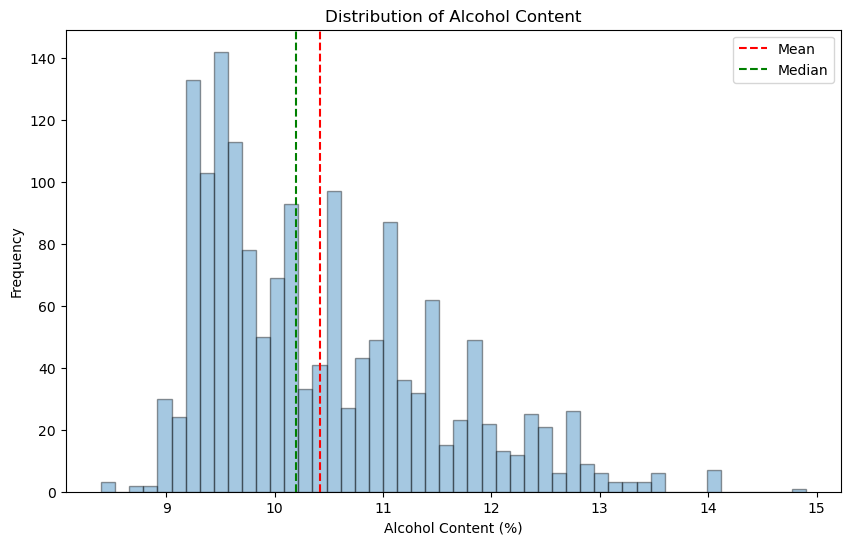

In [6]:
plt.figure(figsize=(10,6))
plt.hist(df['alcohol'], bins=50, edgecolor='black',alpha=0.4)
plt.axvline(df['alcohol'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(df['alcohol'].median(), color='green', linestyle='--', label='Median')
plt.xlabel('Alcohol Content (%)')
plt.ylabel('Frequency')
plt.title('Distribution of Alcohol Content')
plt.legend()
plt.savefig('../../visuals/alcohol_histogram_1.png', dpi=300, bbox_inches='tight')
plt.show()

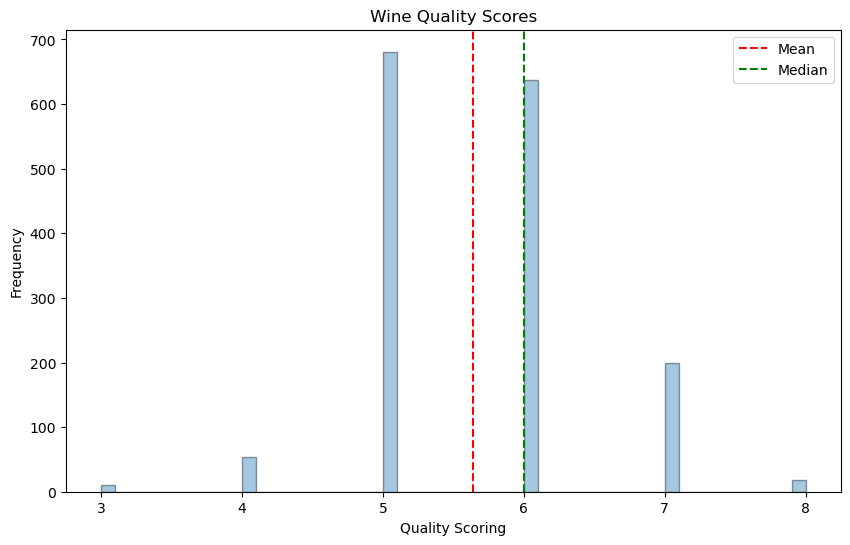

In [7]:
plt.figure(figsize=(10,6))
plt.hist(df['quality'], bins=50, edgecolor='black',alpha=0.4)
plt.axvline(df['quality'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(df['quality'].median(), color='green', linestyle='--', label='Median')
plt.xlabel('Quality Scoring')
plt.ylabel('Frequency')
plt.title('Wine Quality Scores')
plt.legend()
plt.savefig('../../visuals/quality_histogram.png', dpi=300, bbox_inches='tight')
plt.show()

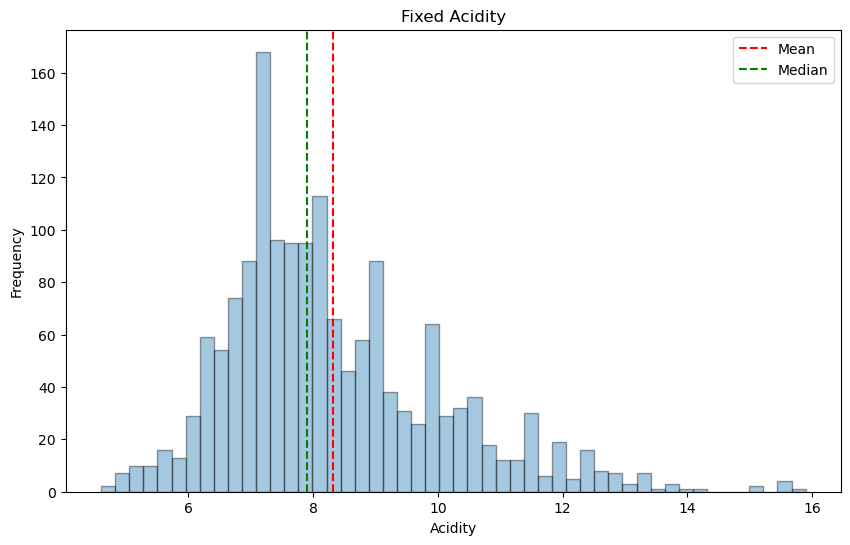

In [8]:
plt.figure(figsize=(10,6))
plt.hist(df['fixed acidity'], bins=50, edgecolor='black',alpha=0.4)
plt.axvline(df['fixed acidity'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(df['fixed acidity'].median(), color='green', linestyle='--', label='Median')
plt.xlabel('Acidity')
plt.ylabel('Frequency')
plt.title('Fixed Acidity')
plt.legend()
plt.savefig('../../visuals/acidity_histogram.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 1000x600 with 0 Axes>

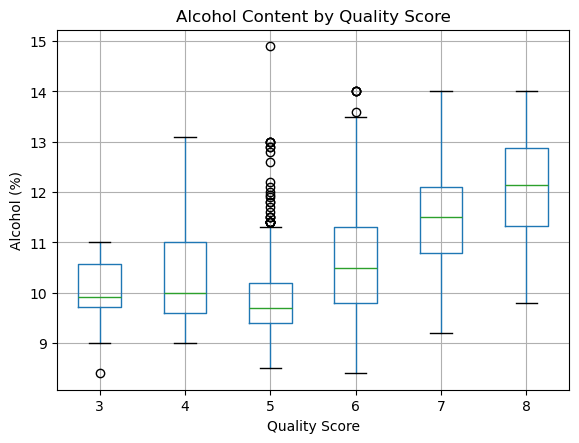

In [12]:
plt.figure(figsize=(10, 6))
df.boxplot(column='alcohol', by='quality')
plt.suptitle('')
plt.title('Alcohol Content by Quality Score')
plt.xlabel('Quality Score')
plt.ylabel('Alcohol (%)')

plt.savefig('../../visuals/quality_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 1000x600 with 0 Axes>

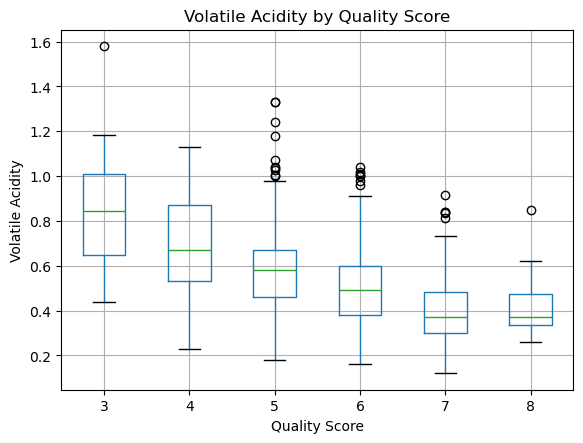

In [16]:
plt.figure(figsize=(10,6))
df.boxplot(column='volatile acidity',by='quality')
plt.suptitle('')
plt.title('Volatile Acidity by Quality Score')
plt.xlabel('Quality Score')
plt.ylabel('Volatile Acidity')
plt.savefig('../../visuals/acidity_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 1000x600 with 0 Axes>

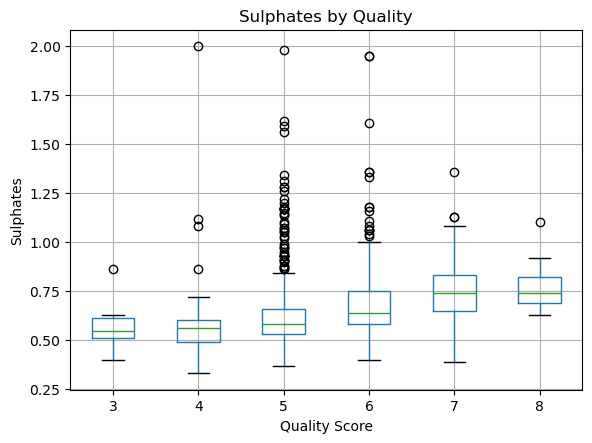

In [17]:
plt.figure(figsize=(10,6))
df.boxplot(column='sulphates',by='quality')
plt.suptitle('')
plt.title('Sulphates by Quality')
plt.xlabel('Quality Score')
plt.ylabel('Sulphates')
plt.savefig('../../visuals/sulphates_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()